# ИУ5-64Б Белозеров Д.С.

## Рубежный контроль №1 (Вариант 1)

### Задание

Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

### Набор данных

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris

### Дополнительное требование
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

## Решение
### Подготовка набора данных

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [54]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

**Пропусков нет**

### График Violin plot для `sepal length (cm)`

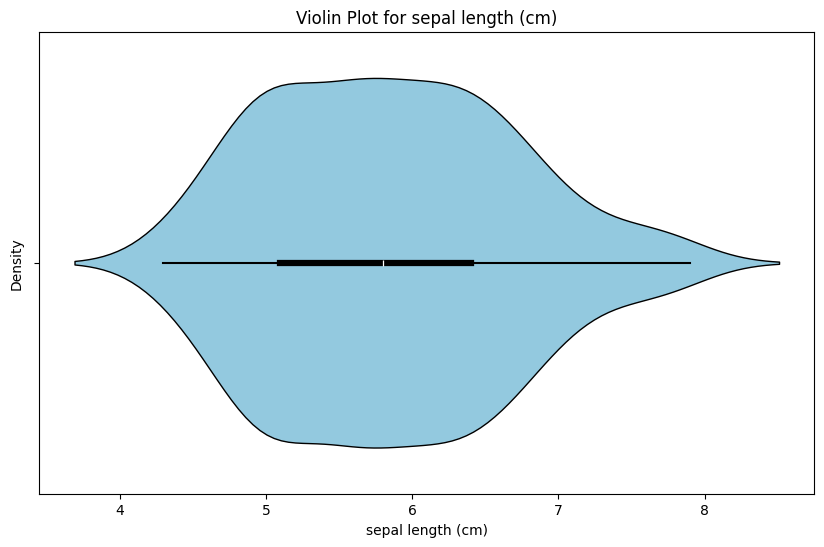

In [55]:

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
column_name = 'sepal length (cm)'

# Построение скрипичной диаграммы
plt.figure(figsize=(10, 6))
sns.violinplot(x=df[column_name], color='skyblue', linewidth=1, linecolor="k")
plt.title('Violin Plot for {}'.format(column_name))
plt.xlabel(column_name)
plt.ylabel('Density')
plt.show()

### Корреляционный анализ

In [56]:
data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


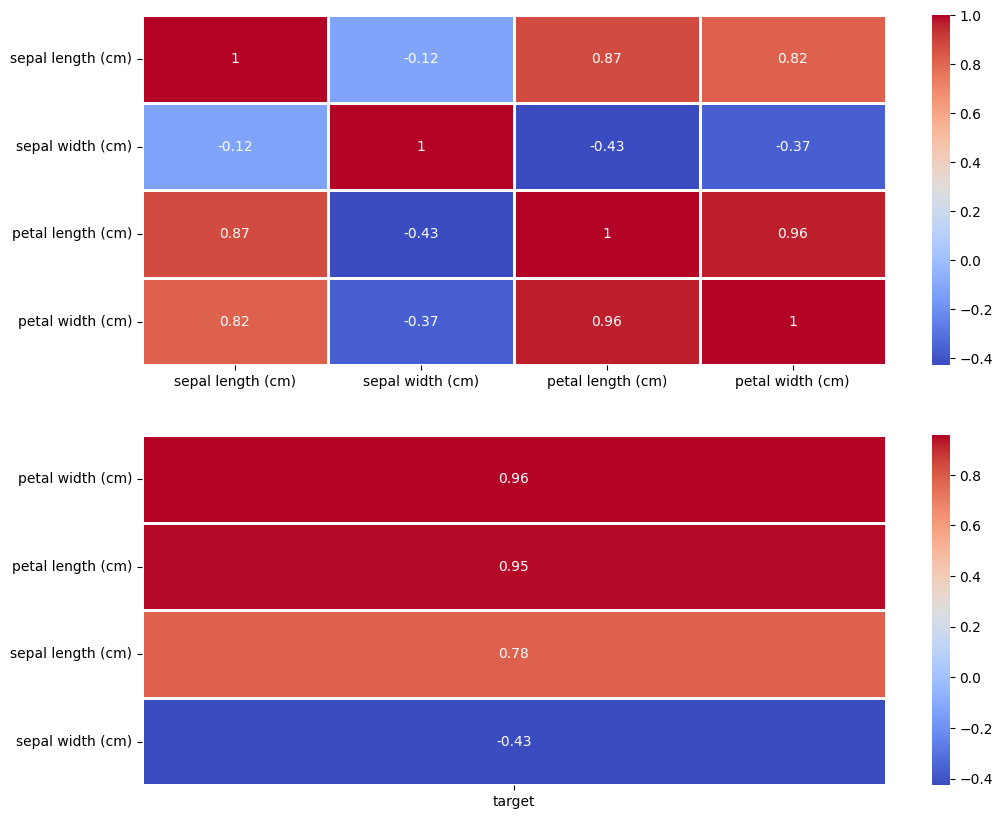

In [57]:
_, axes = plt.subplots(2, 1, figsize=(12, 10))
sns.heatmap(data.drop('target', axis=1).corr(),
            annot=True, cmap='coolwarm', linewidth=2, ax=axes[0])
sns.heatmap(pd.DataFrame(data.corr()['target'].sort_values(ascending=False)[1:]),
            annot=True, cmap='coolwarm', linewidth=2, ax=axes[1])
plt.subplots_adjust(wspace=2)
plt.show()

Выше представлены матрица корреляций признаков между собой и матрица корреляции между признаками и прогнозируемой величиной. Из значений первой матрицы видим крайне высокую (>0.5) корреляцию между следующими парами признаков:

- `petal width (cm)` и `sepal length (cm)	`
- `petal width (cm)` и `petal length (cm)	`
- `petal length (cm)` и `sepal length (cm)	`
- `petal length (cm)` и `petal width (cm)	`

Вторая матрица демонстрирует, что наибольшая связь наблюдается между прогнозируемой величиной и признаком `petal width (cm)`.

Целевая переменная :

- Сильно положительно коррелирует с длиной лепестка (0.95) и шириной лепестка (0.96), что указывает на то, что признаки 'petal length (cm)' и 'petal width (cm)' имеют сильную положительную связь с целевой переменной.
Также существует средняя положительная корреляция с длиной чашелистника (0.78).

Длина и ширина чашелистика:

- Обратно коррелируют между собой (коэффициент корреляции около -0.43).
Оба признака имеют слабую отрицательную корреляцию с шириной лепестка и сильную отрицательную корреляцию с длиной лепестка.

Длина и ширина лепестка:

- Сильно положительно коррелируют между собой (коэффициент корреляции около 0.96).
Оба признака также имеют сильную положительную корреляцию с целевой переменной.

Исходя из этой корреляционной матрицы, можно сделать вывод, что признаки 'petal length (cm)' и 'petal width (cm)' наиболее важны для прогнозирования целевой переменной (вид ириса), так как они имеют самую высокую корреляцию с ней.